# Portfolio Optimization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

In [4]:
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [5]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [7]:
stock_prices.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [8]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


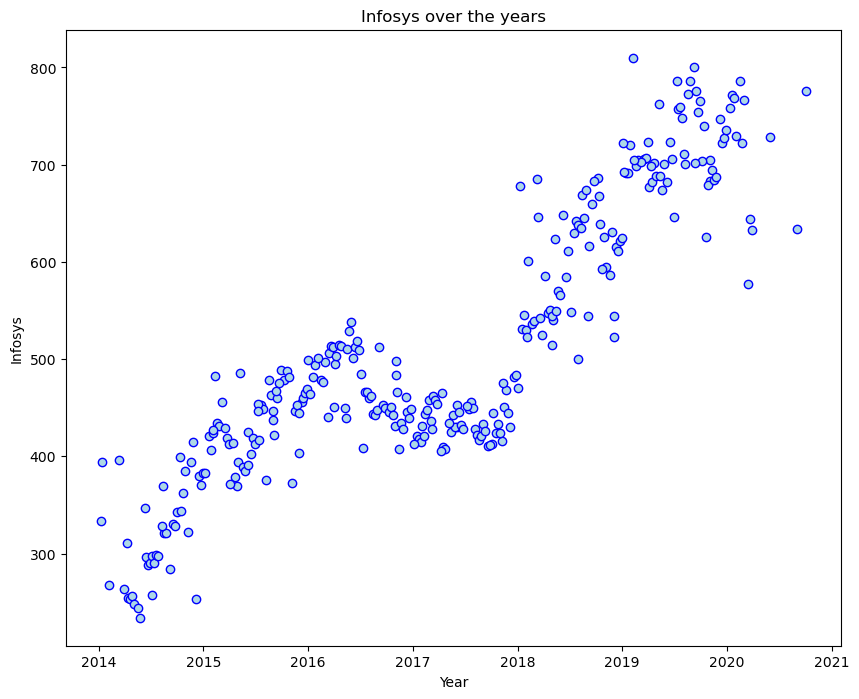

In [9]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

The above graph shows the stock prices of Infosys for a period of 7 years. The highest stock price of Infosys is 810. The lowest stock price of Infosys is 234. The stock price of Infosys shows an increase from its value in 2014. Overall, the stock price of Infosys has increased over the period of 7 years.

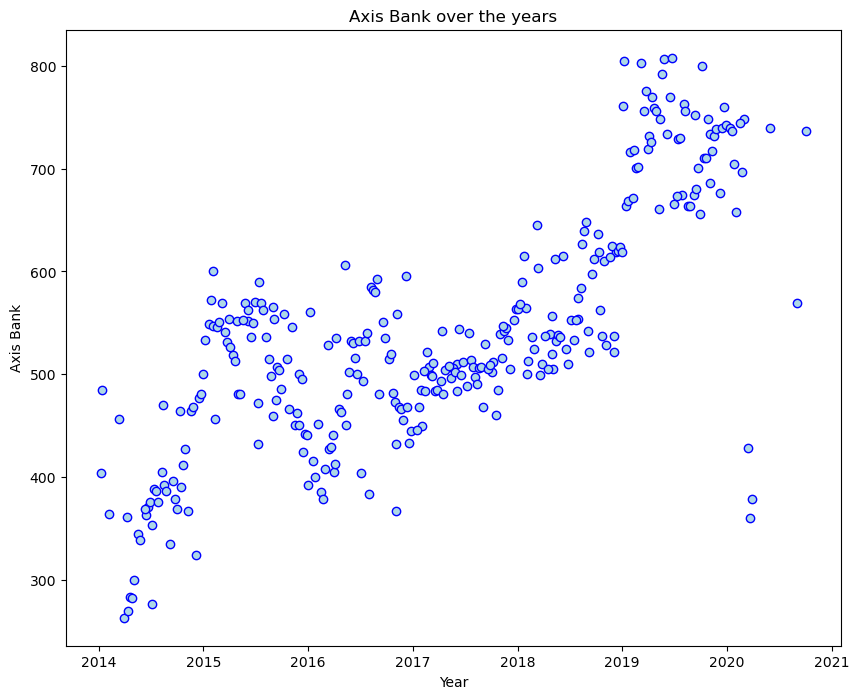

In [10]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Axis Bank')
plt.title('Axis Bank over the years')
plt.show()

The above graph shows the stock prices of axis bank for a period of 7 years. The highest stock price of axis bank is 808. The lowest stock price of axis bank is 263. The stock price of axis bank shows an increase from its value in 2014. Overall, the stock price of axis bank has increased over the period of 7 years

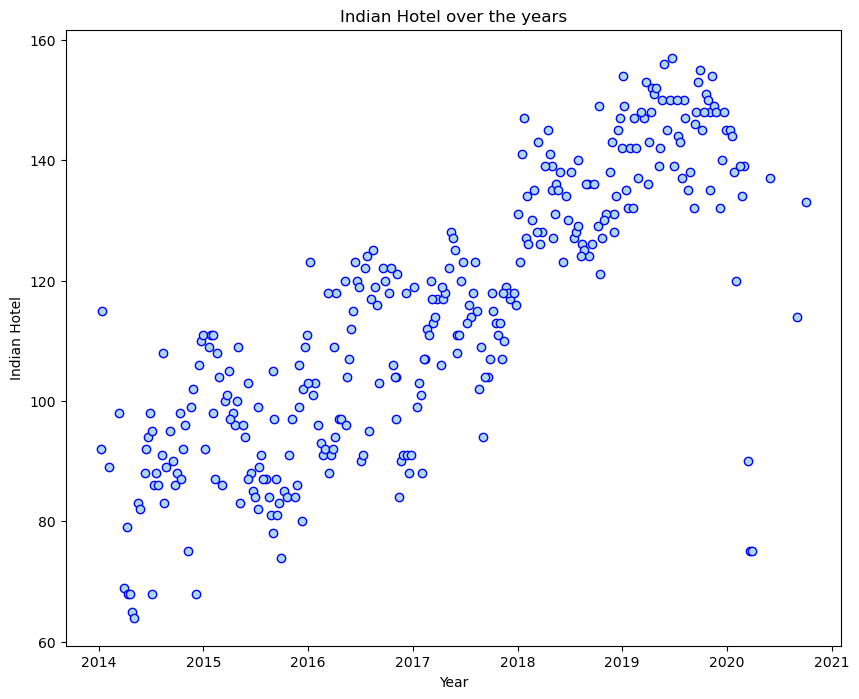

In [11]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Indian Hotel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Indian Hotel')
plt.title('Indian Hotel over the years')
plt.show()

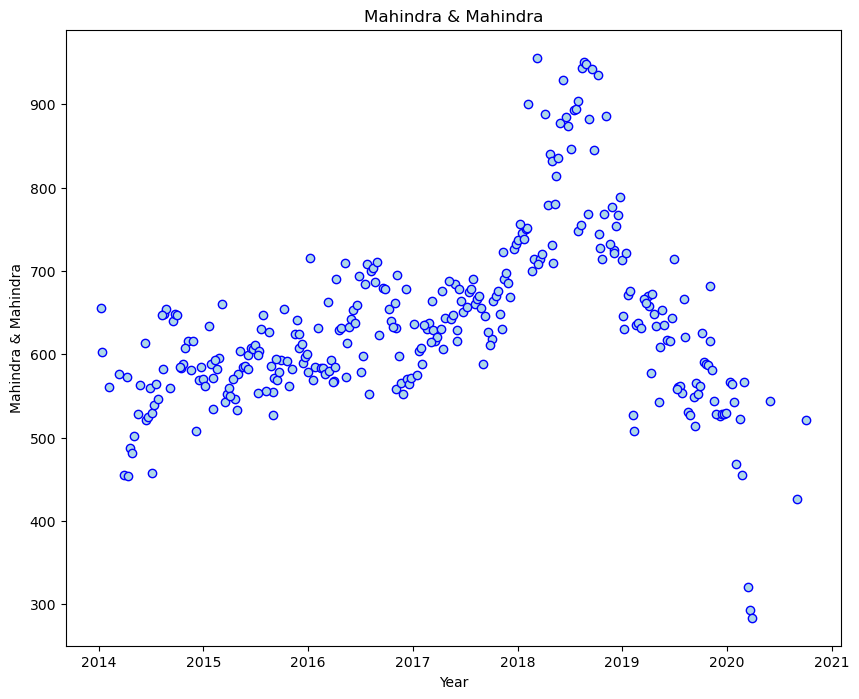

In [12]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra & Mahindra'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Mahindra & Mahindra')
plt.title('Mahindra & Mahindra')
plt.show()

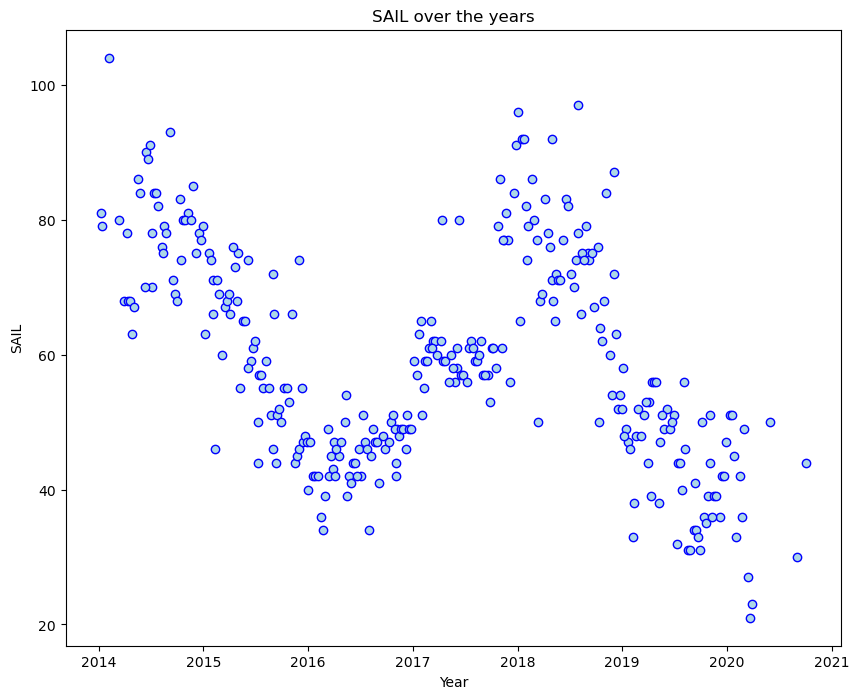

In [13]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['SAIL'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

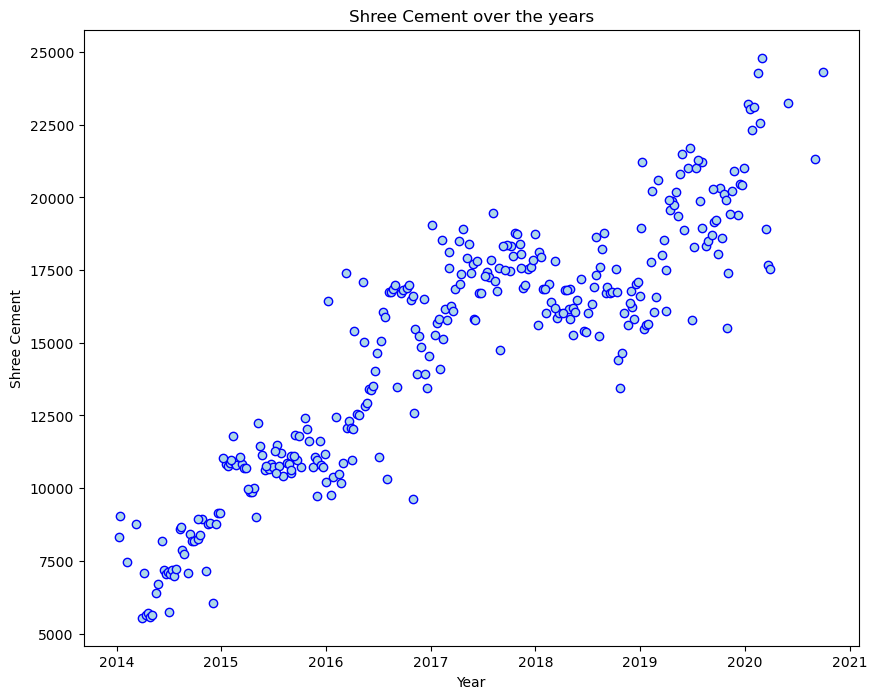

In [14]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Shree Cement'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Shree Cement')
plt.title('Shree Cement over the years')
plt.show()

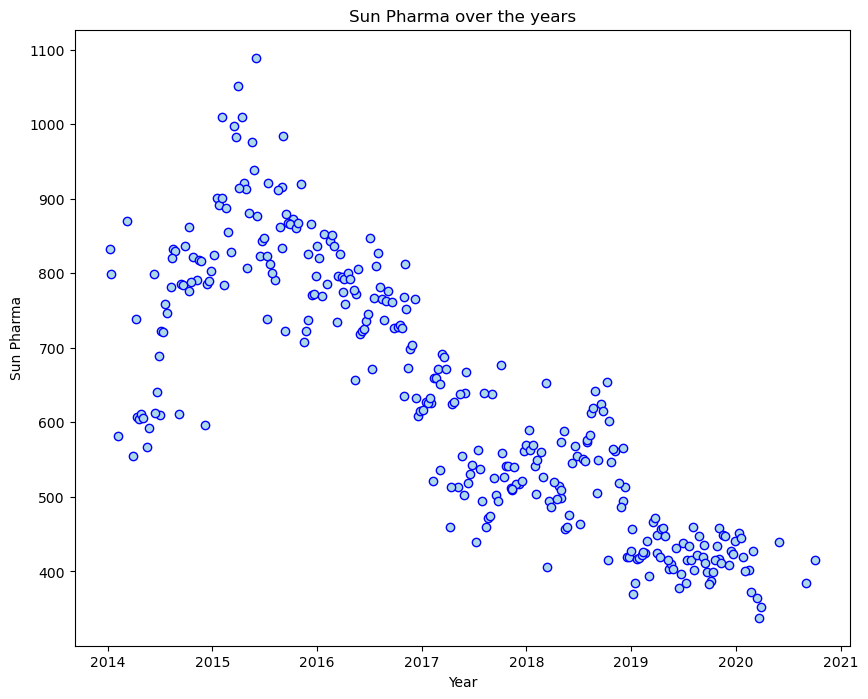

In [15]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Sun Pharma'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun Pharma')
plt.title('Sun Pharma over the years')
plt.show()

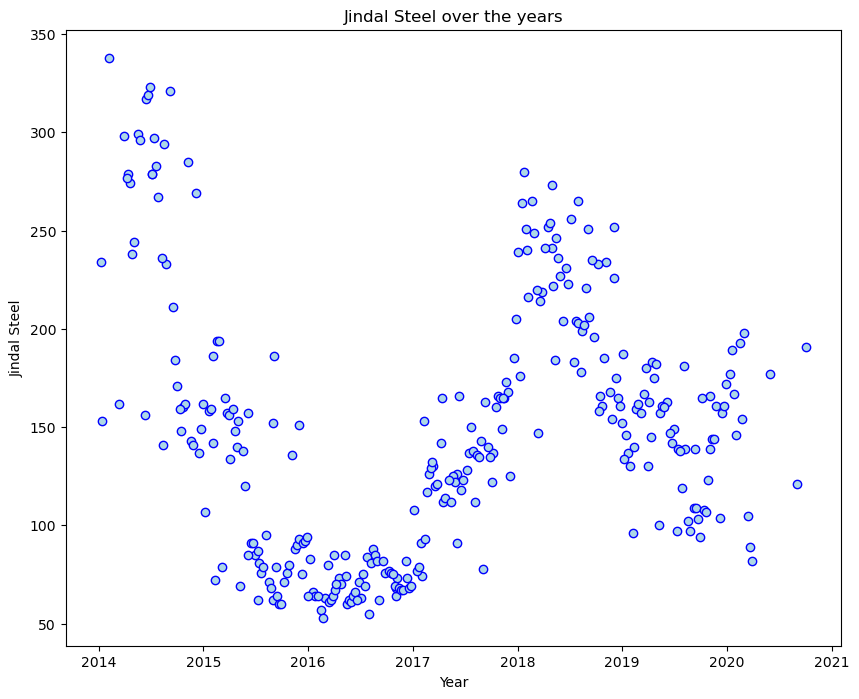

In [16]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Jindal Steel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Jindal Steel')
plt.title('Jindal Steel over the years')
plt.show()

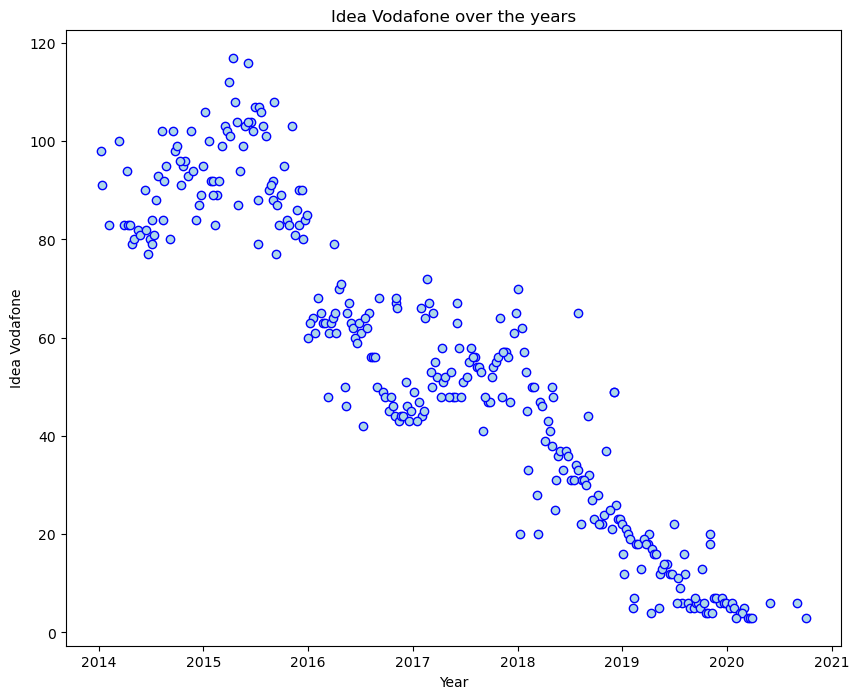

In [17]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea Vodafone'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Idea Vodafone')
plt.title('Idea Vodafone over the years')
plt.show()

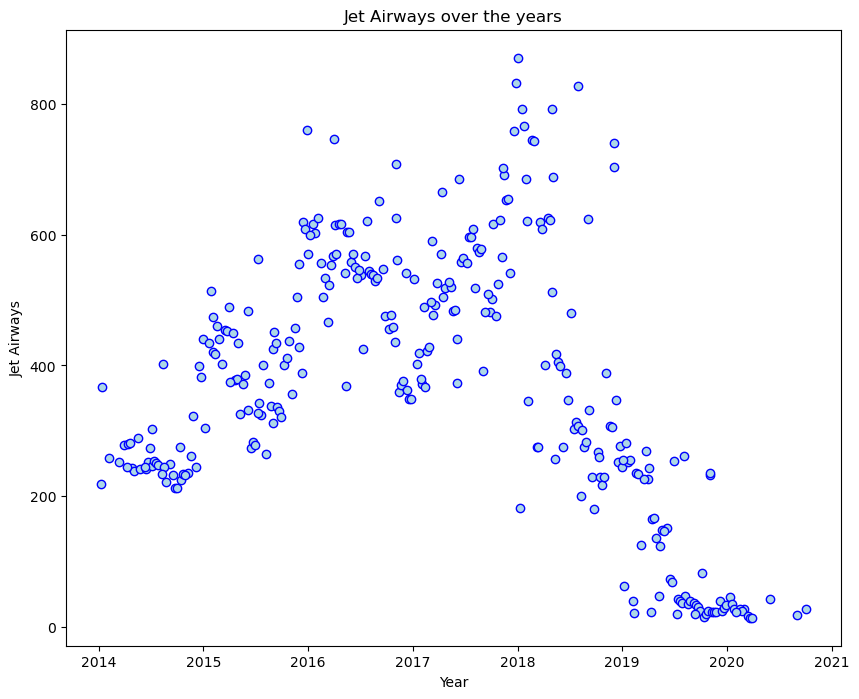

In [18]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Jet Airways'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Jet Airways')
plt.title('Jet Airways over the years')
plt.show()

# Analyzing returns

In [19]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [20]:
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


               The first row contains NaN values because it does not have previous row to calculate returns. The rest of the values show the return for shares.  Negative values appear since log is taken.

In [21]:
stock_returns.shape

(314, 10)

# Means & Standard Deviations of these returns

# Calculating stock means

In [22]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian Hotel           0.000266
Mahindra & Mahindra   -0.001506
Axis Bank              0.001167
SAIL                  -0.003463
Shree Cement           0.003681
Sun Pharma            -0.001455
Jindal Steel          -0.004123
Idea Vodafone         -0.010608
Jet Airways           -0.009548
dtype: float64

# Calculating stock standard deviation

In [24]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian Hotel           0.047131
Mahindra & Mahindra    0.040169
Axis Bank              0.045828
SAIL                   0.062188
Shree Cement           0.039917
Sun Pharma             0.045033
Jindal Steel           0.075108
Idea Vodafone          0.104315
Jet Airways            0.097972
dtype: float64

In [25]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian Hotel,0.000266,0.047131
Mahindra & Mahindra,-0.001506,0.040169
Axis Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree Cement,0.003681,0.039917
Sun Pharma,-0.001455,0.045033
Jindal Steel,-0.004123,0.075108
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972


             Here, the average is the mean and Volatility is the standard deviation. The stock if Infosys has the highest average value. It is followed by Indian Hotel. The stocks of Idea Vodafone have the highest volatility. So, this stock is the riskiest to invest. Similarly, the stocks of Infosys have the lowest volatility. So, it is the safest stock to invest.

# plot stock prices

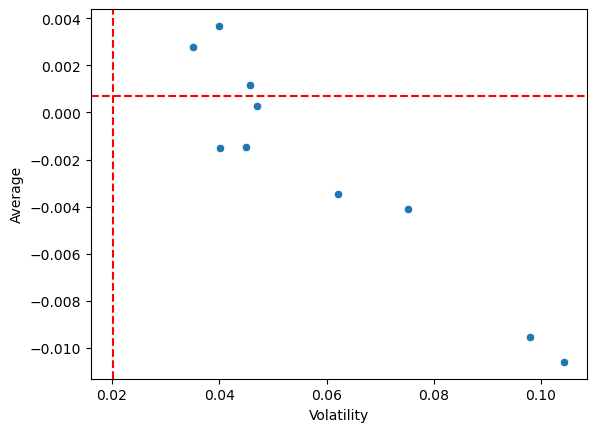

In [26]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()

The stocks with high average value and low volatility are considered for investment. Here, six stocks are suitable for investment. The stocks with low average value and high investment should not be considered. These stocks have high risk. 